In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


In [4]:
laligadf = pd.read_pickle('laligadfmod')
laligadf = laligadf.drop('index',axis=1)
y=laligadf['outcome']
X=laligadf.loc[:, laligadf.columns!='outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.5, 
                                                    shuffle=True, stratify=y)

# Histogram- based Gradient Boosting

In [5]:
boost = GradientBoostingClassifier(learning_rate=0.1,random_state=42,verbose=10)
boost.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [7]:
param_grid  = [{'max_depth': [1,2,3,4,5,None],
               'min_samples_leaf': [5,10,15,20,25,30],
               'n_estimators': [100,200,300,400,500]}]
gs = GridSearchCV(estimator=boost,
                    n_jobs=-1,
                    param_grid=param_grid,
                    scoring='accuracy',)
gs.fit(X_train,y_train) 
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test,y_test)*100))           

In [7]:
boost = HistGradientBoostingClassifier(learning_rate=0.1,random_state=42,verbose=10)
param_grid = [{'max_depth': [1, 2, 3, 4, 5, 6, 7,8],
               'min_samples_leaf': [35,36,37,38,39,40,41,42]}]
gs = GridSearchCV(estimator=boost,
                    n_jobs=2,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=10)
gs.fit(X_train,y_train) 
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test,y_test)*100))  

Binning 0.009 GB of training data: Binning 0.009 GB of training data: 0.054 s
Fitting gradient boosted rounds:
[1/100] 0.069 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 2 leaves, max depth = 1, in 0.040s
1 tree, 2 leaves, max depth = 1, in 0.052s[2/100] 
[2/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[3/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[3/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[4/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[4/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[5/100] 1 tree, 2 leaves, max depth = 1, in 0.006s
[5/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[6/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[6/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[7/100] 1 tree, 2 leaves, max depth = 1, in 0.005s
[7/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[8/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[8/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[9/100] 1 tree, 2 leaves, max depth = 1, in 0.004s
[9/100] 1 tree, 2 leaves

/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Binning 0.009 GB of training data: Binning 0.009 GB of training data: 0.034 s
0.034 s
Fitting gradient boosted rounds:
Fitting gradient boosted rounds:
[1/100] [1/100] 1 tree, 7 leaves, max depth = 3, in 0.009s
[2/100] 1 tree, 6 leaves, max depth = 3, in 0.011s
[2/100] 1 tree, 5 leaves, max depth = 3, in 0.007s
[3/100] 1 tree, 6 leaves, max depth = 3, in 0.010s
[3/100] 1 tree, 6 leaves, max depth = 3, in 0.007s
[4/100] 1 tree, 6 leaves, max depth = 3, in 0.009s
[4/100] 1 tree, 7 leaves, max depth = 3, in 0.008s
[5/100] 1 tree, 7 leaves, max depth = 3, in 0.008s
[5/100] 1 tree, 6 leaves, max depth = 3, in 0.010s
[6/100] 1 tree, 6 leaves, max depth = 3, in 0.009s
[6/100] 1 tree, 6 leaves, max depth = 3, in 0.008s
[7/100] 1 tree, 6 leaves, max depth = 3, in 0.021s
[7/100] 1 tree, 6 leaves, max depth = 3, in 0.025s
[8/100] 1 tree, 6 leaves, max depth = 3, in 0.021s
[8/100] 1 tree, 6 leaves, max depth = 3, in 0.016s
[9/100] 1 tree, 6 leaves, max depth = 3, in 0.007s
[9/100] 1 tree, 7 leaves

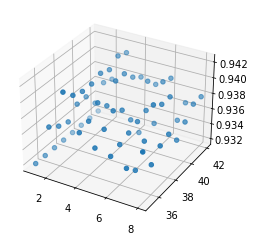

In [14]:
import matplotlib.pyplot as plt
import numpy as np
m = 8
n = 8
X = np.reshape(gs.cv_results_['param_max_depth'].data,[n,m])
Y = np.reshape(gs.cv_results_['param_min_samples_leaf'].data,[n,m])
Z = np.reshape(gs.cv_results_['mean_test_score'],[n,m])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X,Y,Z)


#### After replacing the min samples leaf, we found 38 to be the best and max depth did not really change much as we changed it around.

# Next we will look at Random Forest

In [56]:
Rforest = RandomForestClassifier(random_state=42)
Rforest.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [57]:
Rforest = RandomForestClassifier()

In [58]:
param_grid = [{'n_estimators': [100,200,300,400],
              'criterion': ['gini','entropy']}]
gs = GridSearchCV(estimator=Rforest,
                param_grid=param_grid,
                n_jobs=-1,
                cv=10)
gs.fit(X_train,y_train) 
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test,y_test)*100)) 

Best Accuracy: 92.04%
Best Params: {'criterion': 'entropy', 'n_estimators': 100}
Test Accuracy: 92.84%


In [59]:
param_grid = [{'n_estimators': [20,40,60,80],
              'criterion': ['gini','entropy']}]
gs = GridSearchCV(estimator=Rforest,
                param_grid=param_grid,
                n_jobs=-1,
                cv=10)
gs.fit(X_train,y_train) 
print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test,y_test)*100)) 

Best Accuracy: 92.22%
Best Params: {'criterion': 'gini', 'n_estimators': 40}
Test Accuracy: 92.00%


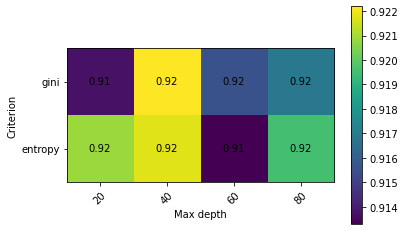

In [60]:
from mlxtend.plotting import heatmap
grid = np.zeros((2, 4))
grid[0, :] = gs.cv_results_['mean_test_score'][:4]
grid[1, :] = gs.cv_results_['mean_test_score'][4:]


heatmap(grid, 
        column_names=[20,40,60,80], 
        row_names=['gini', 'entropy'])
plt.ylabel('Criterion')
plt.xlabel('Max depth')
plt.show()

#### We have looked at a few ensemble methods and thought knn could also be useful in this project.

# NCA
#### We have individual players as a column so we thought reducing dimensionality would help in predicting goals.

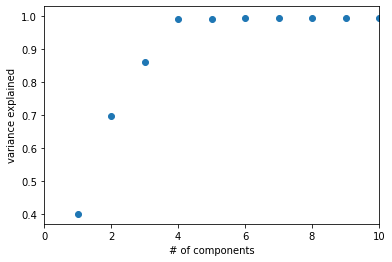

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Here we looked for the least amount of principal components to explain the most amount of explained variance.
mod = PCA(n_components=len(X_test.columns))
mod.fit(X_train,y_train)
a=mod.explained_variance_ratio_.cumsum() #variance explained
b=range(1,len(X_test.columns)+1) #num of components
plt.xlim([0,10])
plt.xlabel('# of components')
plt.ylabel('variance explained')
plt.scatter(b,a)

#### Based off the graph, there wasn't much improvement in explained variance after 4 principal components so 4 components seem best. 

In [89]:
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=4, random_state=42),
)
knn = KNeighborsClassifier()

param_grid = [{'n_neighbors': [46,47,48,49]}]

gs = GridSearchCV(estimator = knn, param_grid=param_grid, cv=10)

nca.fit(X_train, y_train)

gs.fit(nca.transform(X_train),y_train)

acc_knn = gs.score(nca.transform(X_test), y_test)

print(gs.best_params_)
print(gs.best_score_)

{'n_neighbors': 46}
0.9039662698412698


# Logistic Regression
#### Since the target is either goal or no goal logistic regression would work here

In [1]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42,verbose=10,class_weight='balanced')
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [15]:
param_grid = [{'C': [0.1,0.5,1]}]
gs = GridSearchCV(estimator=logreg,
                  param_grid=param_grid,
                  cv=10,
                  n_jobs=2)
gs.fit(X_train,y_train)
print('best parameters:', gs.best_params_)
print('best accuracy')
print('Best test accuracy: ', gs.best_estimator_(X_test,y_test)*100)

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [1]:
!pip install xgboost

In [6]:
import xgboost as xg
xgclass = xg.XGBClassifier()
xgclass.fit(X_train,y_train)
xgclass.score(X_test,y_test)

/Users/matthewvoss/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:03:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9364444444444444

### Now that we have a rough idea of which hyperperameters work well with eachother we will now use cross validation to select the optimal model.